# import liberaries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf
from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import os,pathlib,cv2

sns.set(style='white', context='notebook', palette='deep')

# load Data

In [9]:
trainpath = '../input/vegetable-image-dataset/Vegetable Images/train'
testpath = '../input/vegetable-image-dataset/Vegetable Images/test'
valpath = '../input/vegetable-image-dataset/Vegetable Images/validation'

In [13]:
def count_files(rootdir):
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))

In [17]:
count_files(trainpath)

There are 1000 files in Broccoli
There are 1000 files in Capsicum
There are 1000 files in Bottle_Gourd
There are 1000 files in Radish
There are 1000 files in Tomato
There are 1000 files in Brinjal
There are 1000 files in Pumpkin
There are 1000 files in Carrot
There are 1000 files in Papaya
There are 1000 files in Cabbage
There are 1000 files in Bitter_Gourd
There are 1000 files in Cauliflower
There are 1000 files in Bean
There are 1000 files in Cucumber
There are 1000 files in Potato


In [19]:
count_files(testpath)

There are 200 files in Broccoli
There are 200 files in Capsicum
There are 200 files in Bottle_Gourd
There are 200 files in Radish
There are 200 files in Tomato
There are 200 files in Brinjal
There are 200 files in Pumpkin
There are 200 files in Carrot
There are 200 files in Papaya
There are 200 files in Cabbage
There are 200 files in Bitter_Gourd
There are 200 files in Cauliflower
There are 200 files in Bean
There are 200 files in Cucumber
There are 200 files in Potato


In [22]:
count_files(valpath)

There are 200 files in Broccoli
There are 200 files in Capsicum
There are 200 files in Bottle_Gourd
There are 200 files in Radish
There are 200 files in Tomato
There are 200 files in Brinjal
There are 200 files in Pumpkin
There are 200 files in Carrot
There are 200 files in Papaya
There are 200 files in Cabbage
There are 200 files in Bitter_Gourd
There are 200 files in Cauliflower
There are 200 files in Bean
There are 200 files in Cucumber
There are 200 files in Potato


In [35]:
IMG_WIDTH = 100
IMG_HEIGHT = 100
BATCH_SIZE = 32

# Augmentation

In [37]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(trainpath,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)


test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(testpath,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)



validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(valpath,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [40]:
labels = {value: key for key, value in train_generator.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Bean
1 : Bitter_Gourd
2 : Bottle_Gourd
3 : Brinjal
4 : Broccoli
5 : Cabbage
6 : Capsicum
7 : Carrot
8 : Cauliflower
9 : Cucumber
10 : Papaya
11 : Potato
12 : Pumpkin
13 : Radish
14 : Tomato


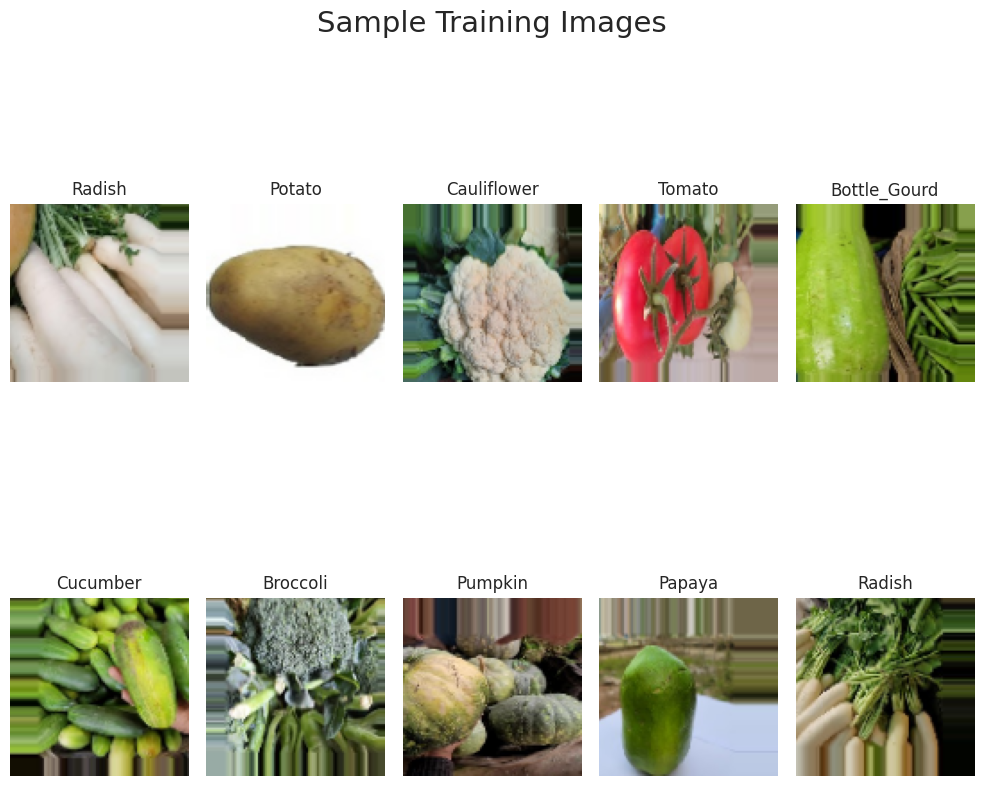

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 10))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

# CNN Model

In [48]:
model = Sequential([
    Conv2D(filters=32,kernel_size= (3, 3), activation='relu',padding='valid', input_shape=(100, 100, 3)),
    MaxPool2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3),padding='valid', activation='relu'),
    MaxPool2D((2, 2)),
    
    Conv2D(filters=128,kernel_size= (3, 3),padding='valid', activation='relu'),
    MaxPool2D((2, 2)),
    
    Conv2D(filters=128,kernel_size= (3, 3),padding='valid', activation='relu'),
    MaxPool2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(15, activation='softmax')  
])

In [49]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,297,615 (4.95 MB)

 Trainable params: 1,297,615 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 230s 486ms/step - accuracy: 0.4163 - loss: 1.6747 - val_accuracy: 0.7093 - val_loss: 0.8633
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 158s 335ms/step - accuracy: 0.7027 - loss: 0.8609 - val_accuracy: 0.7733 - val_loss: 0.6714
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 158s 334ms/step - accuracy: 0.8183 - loss: 0.5515 - val_accuracy: 0.8753 - val_loss: 0.3751
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 334ms/step - accuracy: 0.8800 - loss: 0.3773 - val_accuracy: 0.8863 - val_loss: 0.3572
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 159s 335ms/step - accuracy: 0.9069 - loss: 0.2929 - val_accuracy: 0.8770 - val_loss: 0.4119
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 332ms/step - accuracy: 0.9141 - loss: 0.2699 - val_accuracy: 0.9287 - val_loss: 0.2475
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 332ms/step - accuracy: 0.9276 - loss: 0.2280 - val_accuracy: 0.9337 - val_loss: 0.2067
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 157s 332ms/step - accuracy: 0.9371 -

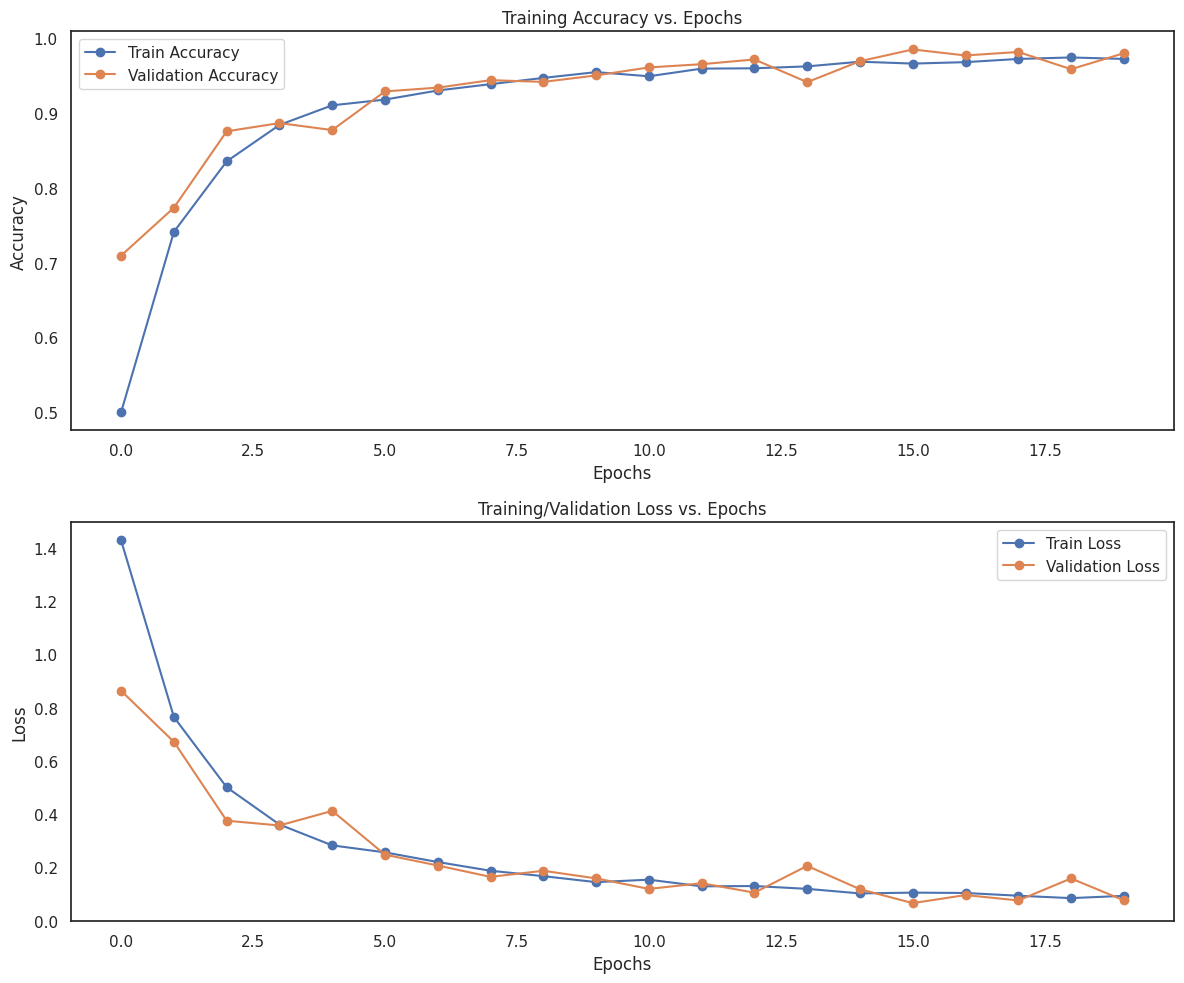

In [54]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [55]:
predictions = model.predict(test_generator)

94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 311ms/step


In [57]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=BATCH_SIZE)
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9833 - loss: 0.0597
Test Loss:     0.06859709322452545
Test Accuracy: 0.9823333621025085


In [58]:
y_pred_classes = np.argmax(predictions, axis=1)
y_true_classes = test_generator.classes

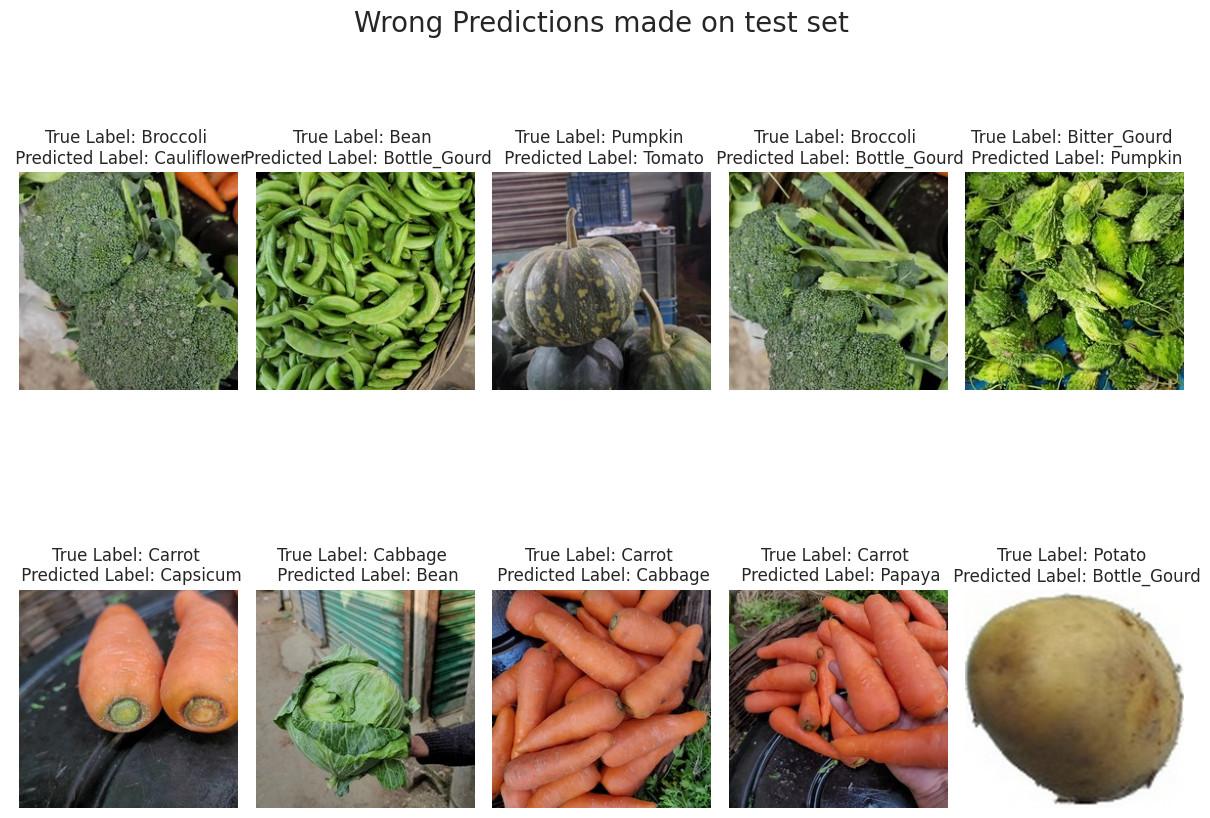

In [70]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]


test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]


fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(testpath, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()

In [71]:
model.save("Vegetables_model.h5")